<a href="https://colab.research.google.com/github/GuttoJQuest/Data_Science_Projects/blob/main/CASE_1_TITANIC_LIMPEZA_E_TRATAMENTO_DE_DADOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ciência de Dados utilizando o Dataset do Titanic

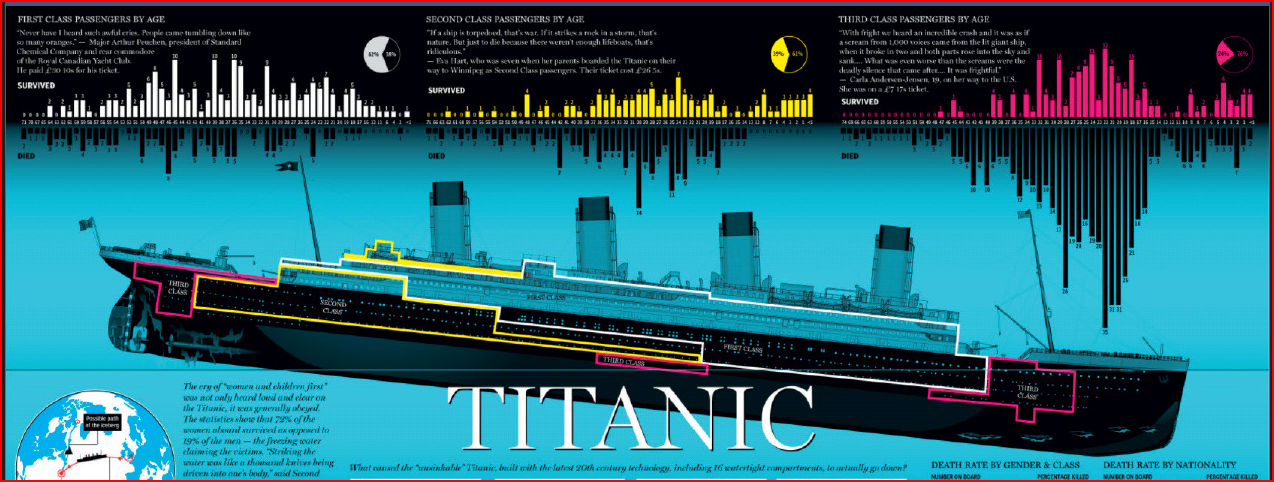

Créditos da imagem: Royal Statistical Society
- Sobre o Gráfico de G.Bron de “The Loss of the 'Titanic'”, de The Sphere , publicado em 4 de maio de 1912.
https://rss.onlinelibrary.wiley.com/doi/10.1111/j.1740-9713.2019.01229.x

# CASE 1 - TITANIC
**Análise do Dataset do Titanic: **

Limpeza e Tratamento de Dados; Análise Descritiva e Estudo do Conjunto de Dados como Relevância para Análise de Negócios.



*   **Análise descritiva:** O conjunto de dados do Titanic contém informações sobre os passageiros, como idade, sexo, classe de viagem, taxa paga, entre outros. Através da análise desses dados, é possível obter informações descritivas sobre a composição demográfica dos passageiros, suas características socioeconômicas e padrões relacionados à sobrevivência.

*   **Análise de fatores-chave:** Ao investigar os fatores que influenciaram a sobrevivência no desastre do Titanic, é possível identificar variáveis-chave que desempenharam um papel significativo. Essa análise pode ser extrapolada para entender quais fatores são críticos em outras situações de negócios, ajudando a tomar decisões informadas e a priorizar áreas de foco.

*   Essas são apenas algumas maneiras pelas quais o estudo do conjunto de dados do Titanic pode ter relevância para a análise de negócios. No entanto, é importante lembrar que a aplicação específica dependerá do contexto e dos objetivos de análise de cada empresa ou projeto.



**Este Case, para fins didáticos, será dividido em 2 projetos:**

*   Project 1_2 - Limpeza e Tratamento de Dados
*   Project 2_2 - Desenvolvimento e Análise Descritiva

# **1 - Importação do Dataset**

In [ ]:
# Importando o pandas e matplotlib
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Importando a base do titanic
titanic = pd.read_csv("train_titanic.csv")


# **2 - Dicionário de Dados**

Importei a base de dados contendo informações do naufrágio do Navio Titanic (acidente ocorrido em 1912), esta base possui informações desafiadoras, detalhadas e pertinentes para desenvolver o meu estudo de análise de dados. Esta vase de dados encontra-se disponível no Kaggle.

**Análise das variáveis nas colunas**

Survival: Sobrevivência (0 = Não, 1 = Sim)

*   Pclass: Classe do bilhete (1 = 1º, 2 = 2º, 3 = 3º)
*   Sex: Gênero (male, female)
*   Age: Idade em anos
*   Sibsp: Nº de irmãos/cônjuges a bordo do Titanic
*   Parch: Nº de pais/filhos a bordo do Titanic
*   Ticket: Número do bilhete
*   Fare: Tarifa do passageiro
*   Cabin: Número da cabine
*   Embarked: Porto de embarcação (C = Cherbourg, Q = Queenstown, S = Southampton)


# **3 - Análise Exploratória Inicial dos Dados**

---



* O Objetivo da leitura com o comando (head) foi explorar os dados importados, a quantidade de linhas informadas entre os parenteses (5): para ter um quantitativo maior de visualização, poderia ser 1, 2, 5 ou até o limite total das linhas.

In [ ]:
# Visualizando a base
titanic.head(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Neste caso usei o comando (shape) e verifiquei que há 891 linhas e 12 colunas.

In [ ]:
# Seu formato em linhas e colunas, respectivamente.
titanic.shape


(891, 12)

* O comando (info) me dá informações preciosas do formato dos dados importados, se são strings (object), números inteiros (int64), flutuantes (float64/ números decimais). É de suma importância a avaliação desses dados, que irão nortear o rumo de nosso tratamento de dados e nortear nossa análise.

In [ ]:
# As informações da base (tipo da coluna, linhas não nulas,...)
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* Observar também que as colunas (Age) e (Cabin) estão incompletas.

* No caso da Coluna (Age), ela estava como float64, não fazendo sentido em nossa análise que a idade seja em anos e meses, podendo ser em inteiro. Pensando dessa forma, farei um tratamento dos dados de float para inteiro.

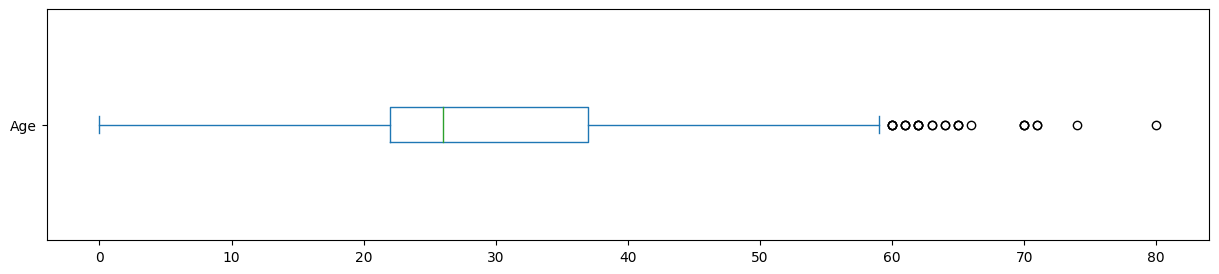

In [ ]:
# Verificar dados da idade e se há registros de outliers com boxplot
titanic.Age.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

Verifico que nos dados da Idade há uma média entre 20 e 30 anos
- Idosos que vão um pouco mais de 70 anos e um Outlier de 80 anos.

# **4 - Depois da observação fazer um tratamento mudando de float64 pra inteiro**

* Para rodar o código de transformação de float para inteiro, é importante preencher os valores vazios da coluna "Age". Isso pode ser feito com zeros ou com a média da coluna, dependendo do contexto da análise.

Para reduzir o enviezamento se usarmos a media geral da coluna "Age", até mesmo porque possui um Outlier de 80 anos, vamos fazer a média por classe.

Nesse caso usaremos a média para cada classe da coluna "Pclass" e com essa média iremos complementar os dados faltantes da coluna "Age".

Para isso vamos criar uma nova coluna que chamaremos de Age_filled.

* **Visualizando os valores vazios.**

In [ ]:
# Visualizar os dados vazios da coluna (Age) encontramos 177 valores vazios
print(titanic['Age'].isna().sum())

177


In [ ]:
# Selecione apenas as linhas com dados ausentes na coluna Idade
missing_rows = titanic.loc[titanic["Age"].isna()]

In [ ]:
# Imprima as primeiras linhas do DataFrame ausente pela coluna "PassengerId".
display(missing_rows.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


* Observe que a coluna Age apresenta apenas os valores ausentes na base de dados.

* **Criando uma nova coluna com a média por classe."**

In [ ]:
# Criando a nova coluna "Age_filled"
titanic["Age_filled"] = titanic.groupby("Pclass")["Age"].transform("mean")

* **Preenchendo os valores ausentes na coluna "Age" com os valores da coluna "Age_filled".**

In [ ]:
# Usando o método groupby() para agrupar os dados pela coluna Pclass.
titanic["Age"].fillna(titanic["Age_filled"], inplace=True)

* **Visualizando a média da coluna Pclass por classe**

In [ ]:
# Agrupe o DataFrame pela coluna Pclass e calcule a média da coluna Age
mean_age_by_pclass = titanic.groupby("Pclass")["Age"].mean().reset_index()

In [ ]:
# Visualizando a média gerada para cada classe da coluna Pclass
print(mean_age_by_pclass[["Pclass", "Age"]])

   Pclass        Age
0       1  38.233441
1       2  29.877630
2       3  25.140620


* **Visualizando apenas as linhas que foram modificadas**

In [ ]:
# Selecione apenas as linhas que foram modificadas
modified_rows = titanic.loc[titanic["Age"] != titanic["Age_filled"]]

In [ ]:
# # Selecione apenas as linhas com PassengerId (apenas algumas linhas para comparar)
selected_rows = titanic[titanic["PassengerId"].isin([6, 18, 20, 27, 29, 30, 32, 33, 37, 43])]

In [ ]:
# Imprimindo as primeiras linhas do DataFrame modificado
display(selected_rows.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_filled
5,6,0,3,"Moran, Mr. James",male,25.140620,0,0,330877,8.4583,NaN,Q,25.140620
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.877630,0,0,244373,13.0000,NaN,S,29.877630
19,20,1,3,"Masselmani, Mrs. Fatima",female,25.140620,0,0,2649,7.2250,NaN,C,25.140620
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.140620,0,0,2631,7.2250,NaN,C,25.140620
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,25.140620,0,0,330959,7.8792,NaN,Q,25.140620
29,30,0,3,"Todoroff, Mr. Lalio",male,25.140620,0,0,349216,7.8958,NaN,S,25.140620
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.233441,1,0,PC 17569,146.5208,B78,C,38.233441
32,33,1,3,"Glynn, Miss. Mary Agatha",female,25.140620,0,0,335677,7.7500,NaN,Q,25.140620
36,37,1,3,"Mamee, Mr. Hanna",male,25.140620,0,0,2677,7.2292,NaN,C,25.140620
42,43,0,3,"Kraeff, Mr. Theodor",male,25.140620,0,0,349253,7.8958,NaN,C,25.140620


* **Confirmando que não há mais valores ausentes.**

In [ ]:
# verificar que não há mais valores ausentes na coluna (Age)
print(titanic['Age'].isna().sum())

0


* **Fazendo o tratamento de float para inteiro.**

In [ ]:
# Fazer o tratamento da coluna em números decimais (float64) para inteiro (int).
titanic['Age'] = titanic['Age'].round(0).astype(int)

In [ ]:
# verificando que na coluna (Age) os valores estão em números inteiros (int).
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_filled   891 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


# **5 - Algumas Análises Estatísticas**
O comando describe() é usado para gerar estatísticas descritivas para as colunas numéricas em um DataFrame.

Para reforçarmos os conceitos, vamos relembrar a definição de variáveis numéricas e categóricas?

**variáveis numéricas:** possuem valores numéricos e podem ser medidas em uma escala quantitativa: Idade, altura, peso, temperatura.

**variáveis categóricas:** não possuem valores numéricos e não podem ser medidas em uma escala quantitativa. cor dos olhos, gênero, estado civil, tipo sanguineo.




### **5.1 Análise das Variáveis Numéricas**

* O comando (describe) é um resumo estatístico do dataset informado e demonstra seus detalhes, como média, desvio padrão e percentil.

* Tem o benefício de informar a média de alguns dados, entre outras estatísticas,
em algumas colunas faz sentido (Age) e em outras não (Survived) e (Pclass)

    - count: Números de valores não nulos

    - mean: média

    - std: desvio padrão dos valores - (O desvio padrão é uma ferramenta estatísticaque pode ser usada para medir a dispersão de um conjunto de dados. Ele pode ser usado para comparar diferentes conjuntos de dados e identificar outliers).

    - min / max: Valores mínimos e máximos

    - 25% / 50% / 75%: primeiro, segundo e terceiro quartil, respectivamente.

In [ ]:
# Resumo estatístico - Variáveis Numéricas
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.754209,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.000828,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* **Resumo Estatístico das variáveis numéricas na coluna "Age".**
   
* Contagem: O número de passageiros com idade conhecida é 891.
* Média: A idade média dos passageiros é de 29,75 anos.
* Desvio padrão: O desvio padrão da idade dos passageiros é de 13,0 anos. Isso significa que a maioria dos passageiros tem idade entre 16,75 e 42,75 anos.
* Mínimo: A idade mínima do passageiro é 1 ano.
* 25º percentil: O 25º percentil da idade dos passageiros é de 22 anos. Isso significa que 25% dos passageiros têm idade inferior a 22 anos.
* 50º percentil: O 50º percentil da idade dos passageiros é de 30 anos. Isso significa que 50% dos passageiros têm idade inferior a 30 anos.
* 75º percentil: O 75º percentil da idade dos passageiros é de 35 anos. Isso significa que 75% dos passageiros têm idade inferior a 35 anos.
* Máximo: A idade máxima do passageiro é de 80 anos.


### **5.2 Análise das Variáveis Categóricas**

Para que possamos ter algumas análises estatísticas para variáveis do tipo object, ajustamos o parâmetro include='O' é usado para incluir apenas as colunas que contêm dados do tipo objeto.

* Quando usamos o comando decribe('include='O')

---


Significa que estou solicitando apenas os dados categóricos.
* count: valores não nulos
* unique: valores unicos em uma tabela
* top: valor mais comum
* freq: frequencia do valor mais comum

**Por exemplo:**

* unique: Na coluna (Sex) tem 2 dados únicos, o mais frequente são homens (male) aparece 577 vezes;
* Na coluna (Embarked) tem 3 dados únicos, sendo (S) mais frequente que a maioria dos passageiros (644), embarcaram em Southampton (S).

In [ ]:
# Resumo estatístico - Variáveis Categóricas.
titanic.describe(include='O')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


* **Resumo Estatístico das variáveis Categóricas**

    * unique: faria sentido em survived pois a frequencia seria 0 e 1,
faria sentido em sex: pois possui valores 1 e 2
    * Homens (male) aparecem 577 vezes
    * A maioria dos passageiros (644) embarcaram em Southampton (S)

# **6 - Cardinalidade**
Retornará o número de valores únicos em cada coluna desse DataFrame. Isso pode ser útil para entender a variabilidade dos dados em cada coluna e obter informações sobre a diversidade dos valores presentes.

In [ ]:
# E a cardinalidade (quantidade de valores únicos em cada uma das colunas)
titanic.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             71
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Conforme o Dicionário de Dados a tabela a cima mostra os valores únicos na tabela, por exemplo (verficar Dic. Dados):

- Survived tem 2 valores válidos (1) sobreviveu e (0)não sobreviveu
- Pclass tem 3 valores válidos: (1) Primeira, (2) Segunda e (3) Terceira Classe
etc..

# **7 - Valores Vazios**

Essa contagem representa quantos valores ausentes existem em cada coluna do conjunto de dados. Retornando uma matriz booleana que indica quais valores no DataFrame são nulos (ausentes) e quais não são.

Em seguida, a função sum() é aplicada a essa matriz booleana, retornando a soma dos valores verdadeiros (True) ao longo de cada coluna.

In [ ]:
# Podemos visualizar diretamente os valores vazios
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Nesse caso:**

* Cabin: 687 valores nulos
* Embarked: 2 valores nulos


**Verificando os valores vazios**

•	Começando com o embarque

Na internet é possivel verificar informações confiáveis que estão faltando neste dataframe. Outros dados, assim como na coluna Embarked, conseguimos estes dados facilmente na Wikipedia: https://pt.wikipedia.org/wiki/Passageiros_do_RMS_Titanic

In [ ]:
# Verificando os registros com embarque vazio
titanic[titanic.Embarked.isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,B28,NaN


In [ ]:
# Atualizando o valor para as 2 linhas
titanic.loc[titanic.Embarked.isnull(), 'Embarked'] = 's'


In [ ]:
# Visualizando os registros vazios após o comando (isnull)
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
# Podemos visualizar novamente os valores vazios
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# **Conclusão**

**Project 1_2 - Limpeza e tratamento de dados**

Após a aplicação de técnicas de limpeza e tratamento de dados no dataset do Titanic, foi possível obter um conjunto de dados mais confiável e consistente para análise. Foram corrigidos valores ausentes por meio de estratégias como imputação de dados faltantes. Além disso, foram verificadas e corrigidas inconsistências nos dados, garantindo que as entradas estivessem categorizadas corretamente.

A qualidade dos dados aprimorada permitirá uma melhor compreensão e exploração dos fatores que influenciaram a sobrevivência dos passageiros a bordo do Titanic, fornecendo insights valiosos e reflexões para a segunda abordagem no desenvolvimento.

É importante afirmar que a coluna idade (Age), haviam 177 valores vazios que foram preenchidos com a média por classe da coluna Pclass e foram substituidos os dados ausentes da coluna Age com a média específica de cada classe, logo após foram tratados os valores de float para valores como inteiro (int) desta coluna.

Em especial a coluna (Cabin), será mantida como está, como reflexão da melhor estratégia para abordar esse tratamento, sendo que, sua função é de suma importância para reconstrução do cenário de crise. Em um outro momento irei revisitar o case para inserir a melhor solução.

Durante todo o processo de limpeza e tratamento de dados, foram adotadas práticas de documentação detalhadas, garantindo a rastreabilidade das etapas realizadas. Isso possibilitou a replicação do processo e a supervisão das decisões tomadas em relação à manipulação dos dados.

**Este case é dividido em 2 partes, a segunda parte será:**

Project 2_2 – Desenvolvimento e Aprofundamento da Análise Exploratória e Descritiva

O processo de limpeza e tratamento de dados resultou em um conjunto de dados aprimorados, proporcionando uma compreensão mais precisa dos fatores que influenciaram a sobrevivência dos passageiros a bordo do Titanic. A reflexão desse primeiro estudo será fundamental para inspirar as hipóteses que irão fundamentar uma pesquisa futura no desenvolvimento aprimorado destes dados.
